<a href="https://colab.research.google.com/github/Jems-Chawin/Machine-Learning-Lab/blob/main/Lab3/Lab3_1_SVM_HardPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LAB 3 - PART 1 SVM Kernel Hard Prediction**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#### **Read csv file**

In [ ]:
### START CODE HERE ###
df = pd.read_csv('data_sample.csv')
df
### END CODE HERE ###

,Target,Radius,Texture
0,1,2.5,4.1
1,0,1.2,3.8
2,1,5.0,1.4
3,0,3.1,2.9
4,1,4.3,5.2
5,1,3.8,6.1
6,1,2.8,4.2
7,0,2.2,3.4


#### **Split the data for Train and Test**
First 5 rows for train and the rest for test.

In [ ]:
### START CODE HERE ###
train = df.iloc[:5,:]
test = df.iloc[5:,:]
### END CODE HERE ###

Split targets and feature as y and x respectively.
- `y` : `Target`
- `x` : `Radius,Texture`

In [ ]:
### START CODE HERE ###
x_train = train.iloc[:,1:].values
y_train = train.iloc[:,0:1].values
x_test = test.iloc[:,1:].values
y_test = test.iloc[:,0:1].values
### END CODE HERE ###

### **Create and observe the kernel behavior**

Here is the kernel function.
$$K_i(x_j,x_i) = exp(-\gamma||x_j-x_i||^2)$$
After obtaining the kernel values, you will perform a 3D visualization of $(x_1,x_2,K_i)$.

**Create the function that return all kernels as a list.**

In [ ]:
def matrix_calculate_kernel(x_test, x_train):
  kernels = []
  gamma = 1
  for each_x in x_train:
    for x in x_test:
      kernel = np.exp(-gamma * np.linalg.norm(x - each_x)**2)
      kernels.append(kernel)
  return kernels


<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

It is not necessary to print the output like this. Simply compare the values obtained with the expected results.
- Kernel 1 :`[1.00000000e+00 1.68638147e-01 1.31720301e-06 1.65298888e-01 1.16785670e-02]`
- Kernel 2 :`[1.68638147e-01 1.00000000e+00 1.68752986e-09 1.20342323e-02 9.44523667e-06]`
- Kernel 3 :`[1.31720301e-06 1.68752986e-09 1.00000000e+00 2.85124368e-03 3.28082741e-07]`
- Kernel 4 :`[0.16529889 0.01203423 0.00285124 1.         0.00119453]`
- Kernel 5 :`[1.16785670e-02 9.44523667e-06 3.28082741e-07 1.19453296e-03 1.00000000e+00]`

</details>



In [ ]:
matrix_calculate_kernel(x_train,x_train)

[1.0,
 0.16863814726859555,
 1.317203011707747e-06,
 0.16529888822158664,
 0.011678566970395453,
 0.16863814726859555,
 1.0,
 1.6875298575085319e-09,
 0.012034232284723775,
 9.445236666432097e-06,
 1.317203011707747e-06,
 1.6875298575085319e-09,
 1.0,
 0.0028512436826796323,
 3.2808274140285713e-07,
 0.16529888822158664,
 0.012034232284723775,
 0.0028512436826796323,
 1.0,
 0.0011945329581411741,
 0.011678566970395453,
 9.445236666432097e-06,
 3.2808274140285713e-07,
 0.0011945329581411741,
 1.0]

Use the weight ($\theta_{1-n}$) and bias ($\theta_{0}$) base on your activity last.

In [ ]:
kernels_train = matrix_calculate_kernel(x_train,x_train)
### START CODE HERE ###
w = [0.5,-1,0.5,-1,0.5]
b = 0
### END CODE HERE ###

Create the `compare_3dplot` function to plot difference raw kernels $(x_1,x_2,K_i)$ and weighted kernels $(x_1,x_2,\theta_i K_i)$.<br>
**NOTE** : Plot as subplots, and in each subplot, also plot $(x_1,x_2,0)$  with a different color to visualize the $(x_1,x_2)$ before applying the kernel.

<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- There is a parameter : `projection='3d'`
</details>


In [ ]:
def compare_3dplot(x_train,kernels,w):
    """
    Parameters:
    - x_train (numpy.ndarray): The input training data.
    - kernels (numpy.ndarray): The array of kernel values.
    - w (float): The weight parameter.
    """
    ### START CODE HERE ###
    fig, axs = plt.subplots(1, 2, subplot_kw={"projection": "3d"})

    # Raw kernels plot
    axs[0].scatter(x_train[:,0], x_train[:,1], kernels)
    axs[0].set_title("Raw Kernels")

    # Plane for original x1, x2
    xx, yy = np.meshgrid(np.linspace(0,5,2), np.linspace(0,6,2))
    axs[0].plot_surface(xx, yy, np.zeros_like(xx), alpha=0.5)

    # Weighted kernels plot
    weighted_kernels = kernels * w
    axs[1].scatter(x_train[:,0], x_train[:,1], weighted_kernels)
    axs[1].set_title("Weighted Kernels")

    # Plane for original x1, x2
    axs[1].plot_surface(xx, yy, np.zeros_like(xx), alpha=0.5)

    plt.show()

    ### END CODE HERE ###

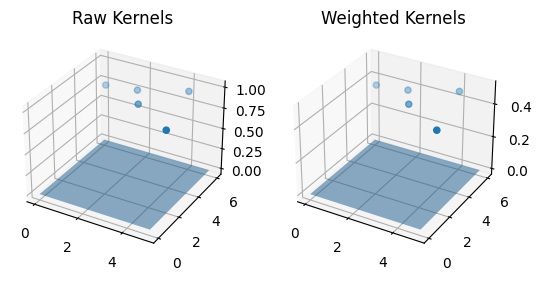

In [ ]:
compare_3dplot(x_train,kernels_train[0],w[0])

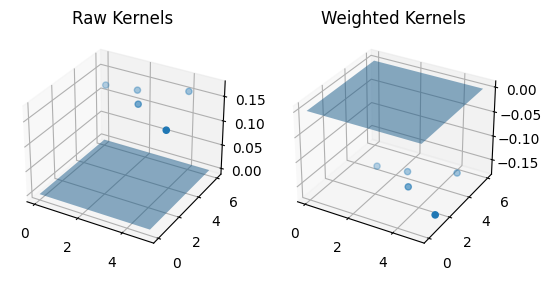

In [ ]:
compare_3dplot(x_train,kernels_train[1],w[1])

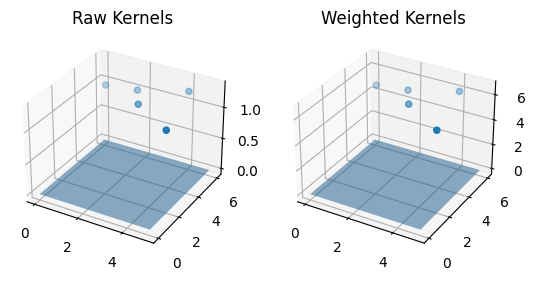

In [ ]:
compare_3dplot(x_train,kernels_train[2],w[2])

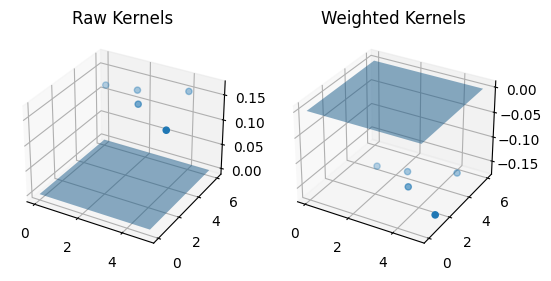

In [ ]:
compare_3dplot(x_train,kernels_train[3],w[3])

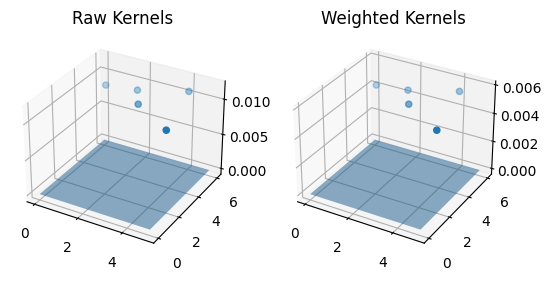

In [ ]:
compare_3dplot(x_train,kernels_train[4],w[4])

### **SVM decision function**
Create the SVM decision function that return the predicted class.
$$
K_i(x_j,x_i) = exp(-\gamma||x_j-x_i||^2) \\
h(X) = \sum_{i=1}^N\theta_i K_i + \theta_0\\

\hat{Y} =
\begin{cases}
    1 &  h \geq 0 \\
    0 & \text{otherwise}
\end{cases}

$$


In [ ]:
def svm_decision_function(x, x_train, w, b, gamma=1):
    """
    Predict the class of the input x using an SVM decision function.

    Parameters:
    - x (numpy.ndarray): The input data for prediction.
    - x_train (numpy.ndarray): The training data.
    - w (numpy.ndarray): The weight vector.
    - b (float): The bias term.
    - gamma (float): The gamma parameter for the RBF kernel (default is 1).

    Returns:
    - int: The predicted class (0 or 1).
    """

    ### START CODE HERE ###
    kernels = []
    for xi in x_train:
        kernel = np.exp(-gamma * np.linalg.norm(x - xi)**2)
        kernels.append(kernel)

    f_x = np.dot(w, kernels) + b

    if f_x >= 0:
        pred_class = 1
    else:
        pred_class = 0



    ### END CODE HERE ###
    return pred_class

### **Confusion matrix**
Create the confusion matrix from your prediction. Then, calculate the precision and recall values.<br><br>
<span style='color: red;'>**NOTE** : From scratch only.</span>


|            | Predicted Negative | Predicted Positive |
|------------|--------------------|--------------------|
| **Actual Negative** | True Negative (TN) | False Positive (FP) |
| **Actual Positive** | False Negative (FN) | True Positive (TP) |


$\text{Precision} = \frac{TP}{TP + FP}$

$\text{Recall} = \frac{TP}{TP + FN}$

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical.</br>

```
Confusion Matrix:
[[1 0]
[0 2]]
Precision: 1.0
Recall: 1.0
```

</details>

In [ ]:
### START CODE HERE ###
y_true = np.array([0, 1, 1])
y_pred = np.array([0, 1, 1])

# Initialize confusion matrix
TP = 0 # True positives
FP = 0 # False positives
FN = 0 # False negatives
TN = 0 # True negatives

# Calculate confusion matrix
for yt, yp in zip(y_true, y_pred):
  if yt == 1 and yp == 1:
    TP += 1
  elif yt == 0 and yp == 1:
    FP += 1
  elif yt == 1 and yp == 0:
    FN += 1
  else:
    TN += 1

confusion_matrix = np.array([[TN, FP], [FN, TP]])

print("Confusion Matrix:")
print(confusion_matrix)

# Calculate precision and recall
precision = TP / (TP + FP)
recall = TP / (TP + FN)

print(f"Precision: {precision}")
print(f"Recall: {recall}")




### END CODE HERE ###

Confusion Matrix:
[[1 0]
 [0 2]]
Precision: 1.0
Recall: 1.0


### Question
1. What would happen if we choose fewer support vectors (number of kernels)?
2. If weights are changed to w = [0.2, 0.4, 0.1, -0.2, 0.6], what impact would this have on the classification results, and what is the underlying reason for the changes?

1.
การเลือกใช้เวกเตอร์สนับสนุนจํานวนน้อยลง จะทําให้เส้นแบ่งกลุ่มตัดสินใจ (decision boundary) ที่ได้มีความซับซ้อนน้อยลง ซึ่งอาจจะทําให้เกิดปัญหา underfitting กับข้อมูลฝึกสอนได้ เนื่องจากมีข้อมูลเกี่ยวกับรูปร่างของเส้นแบ่งกลุ่มตัดสินใจน้อยเกินไป ซึ่งจะส่งผลให้ความแม่นยําของโมเดลลดลงโดยเฉพาะอย่างยิ่งกับงานจําแนกประเภทที่มีความซับซ้อนสูง
2. การเปลี่ยนแปลงน้ําหนักจะส่งผลให้ความสําคัญของเวกเตอร์สนับสนุนแต่ละตัวต่อฟังก์ชันตัดสินใจค่าสุดท้ายเปลี่ยนไปด้วย โดยที่เวกเตอร์สนับสนุนที่มีน้ําหนักมากจะมีอิทธิพลมากกว่า ส่วนเวกเตอร์ที่มีน้ําหนักติดลบจะมีอิทธิพลน้อยลง

ในกรณีนี้ เวกเตอร์สนับสนุนตัวที่ 3 และ 4 จะมีอิทธิพลน้อยลง ขณะที่เวกเตอร์ตัวที่ 5 จะมีอิทธิพลมากขึ้นต่อเส้นแบ่งกลุ่มตัดสินใจ ซึ่งอาจทําให้เส้นแบ่งเอียงไปทางบริเวณข้อมูลนําเข้าบางส่วน

เหตุผลพื้นฐานคือ น้ําหนักควบคุมการมีส่วนร่วมของเวกเตอร์สนับสนุนแต่ละตัวในการกําหนดเส้นแบ่งกลุ่มตัดสินใจ เมื่อเปลี่ยนน้ําหนัก รูปร่างและทิศทางของเส้นแบ่งกลุ่มตัดสินใจจะเปลี่ยนไปด้วย ทําให้จุดข้อมูลทดสอบตกอยู่ข้างใดของเส้นแบ่ง